In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


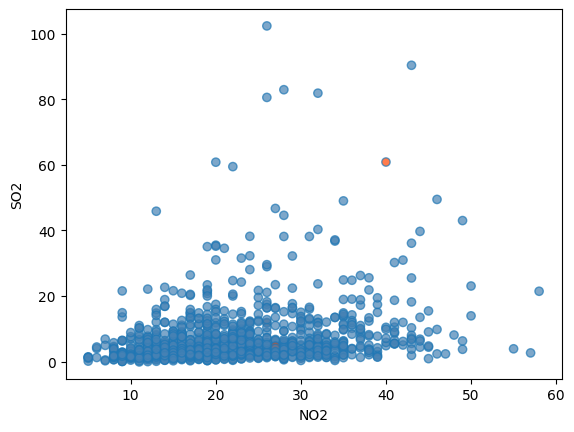

In [2]:
cinci_pollution = pollution[pollution.city == 'Cincinnati']

# Make an array of colors based upon if a row is a given day
cinci_colors = ['orangered' if day == 38 else 'steelblue'
                    for day in cinci_pollution.day]
# Plot with additional scatter plot argument facecolors
p = sns.regplot(x='NO2',
                y='SO2',
                data = cinci_pollution,
                fit_reg=False,
                scatter_kws={'facecolors': cinci_colors,'alpha': 0.7})

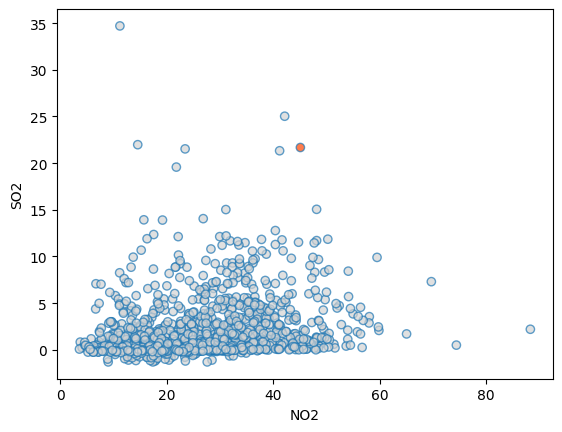

In [3]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

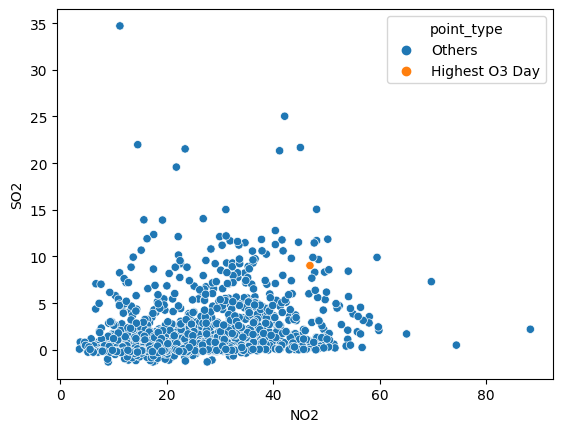

In [4]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

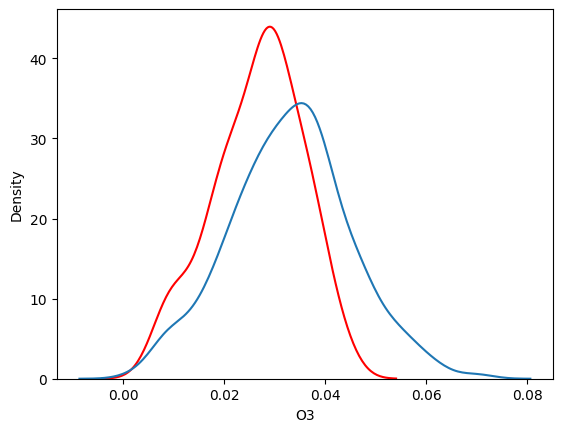

In [5]:
pollution_nov = pollution[pollution.month == 10]
sns.kdeplot(pollution_nov[pollution_nov.city == 'Denver'].O3, color = 'red')
sns.kdeplot(pollution_nov[pollution_nov.city != 'Denver'].O3)
plt.show()

## Comparing groups

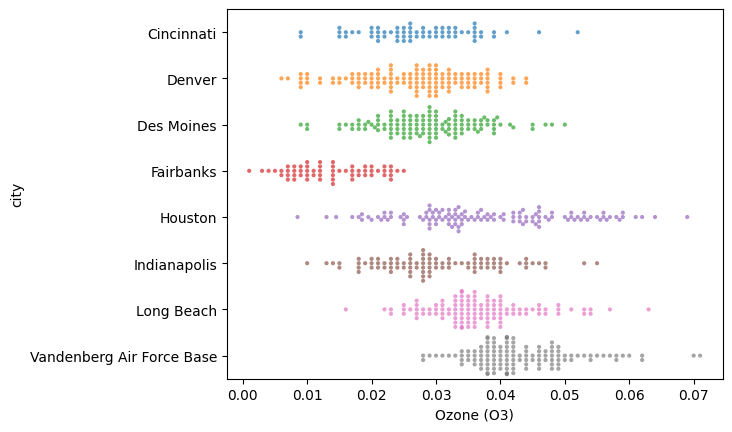

In [6]:
pollution_nov = pollution[pollution.month == 10]
sns.swarmplot(y="city", x="O3", data=pollution_nov, size=3, hue='city', alpha=0.7, legend=False)
plt.xlabel("Ozone (O3)")
plt.show()

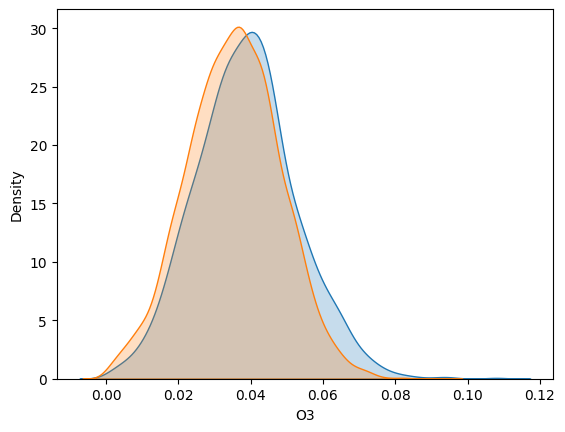

In [7]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            fill = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label           
            fill = True,
            label = 'other years')
plt.show()

Improving a kde plot

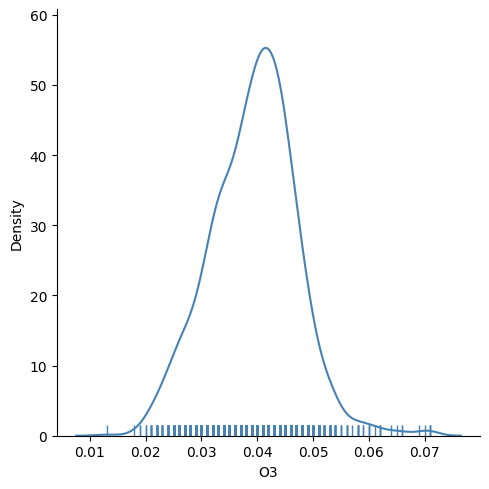

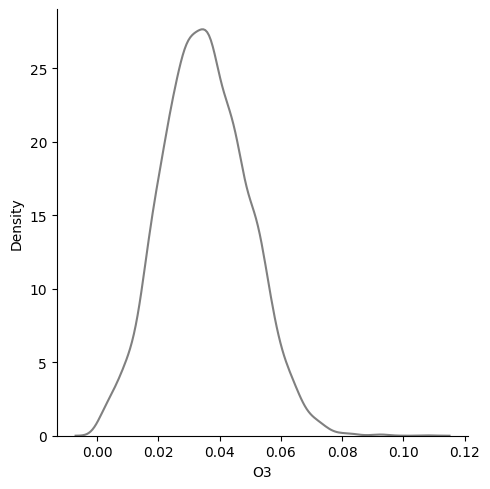

In [8]:
sns.displot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
            label = 'Vandenberg',
            color = 'steelblue',
            # set type to shaded kde
            kind = 'kde',  
            # Turn on rugplot
            rug = True)

sns.displot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
            label = 'Other cities',
            kind = 'kde',
            color = 'gray')
plt.show()

Beeswarms (swarmplots)

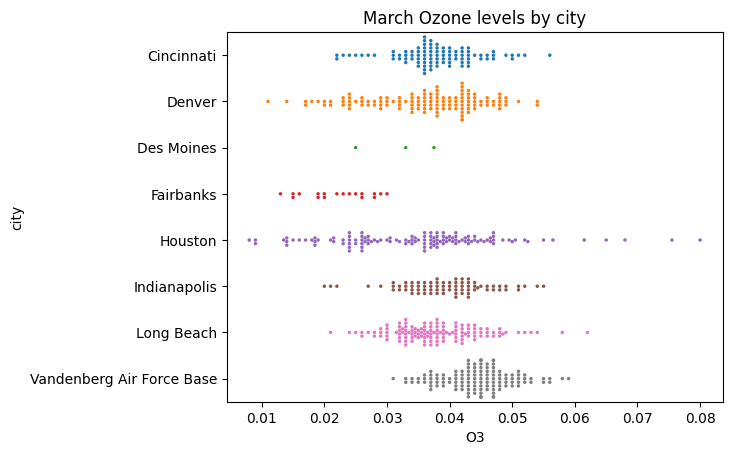

In [9]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = "O3", 
              data = pollution_mar,
              hue='city',
              legend=False, 
              # Decrease the size of the points to avoid crowding 
              size = 2.5)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

### Annotations

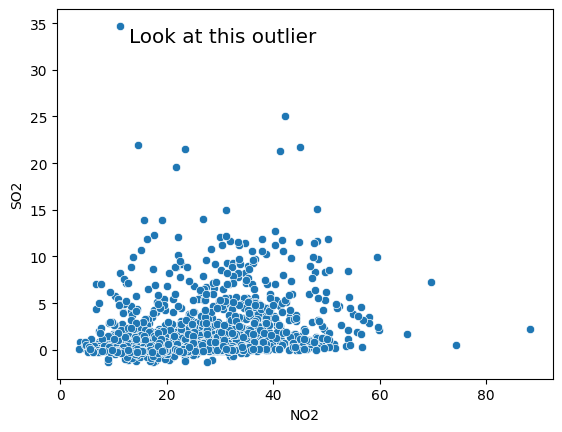

In [10]:
sns.scatterplot(x='NO2', y='SO2', data = houston_pollution)
# X and Y location of outlier and text
plt.text(13,33,'Look at this outlier',
# Text properties for alignment and size.
fontdict = {'ha': 'left', 'size': 'x-large'})
plt.show()

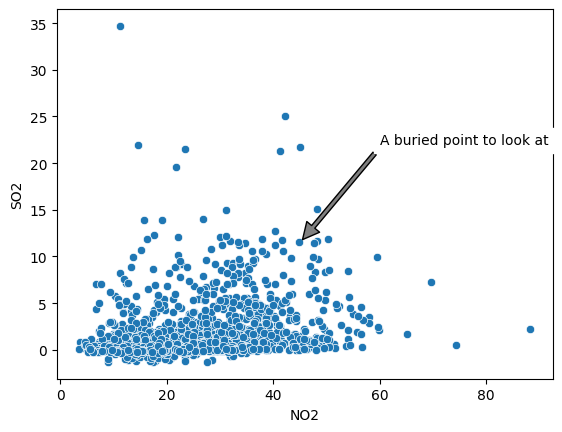

In [11]:
# with an arrow

sns.scatterplot(x='NO2', y='SO2', data = houston_pollution)
# Arrow start and annotation location
plt.annotate('A buried point to look at', xy=(45.5,11.8), xytext=(60,22),
# Arrow configuration and background box
arrowprops={'facecolor':'grey', 'width': 3}, backgroundcolor = 'white' )
plt.show()

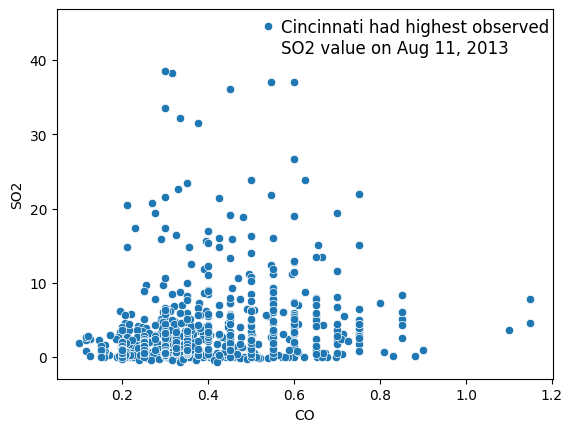

In [12]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

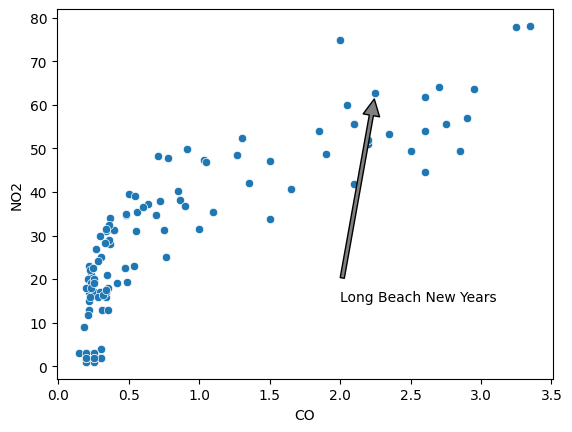

In [13]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

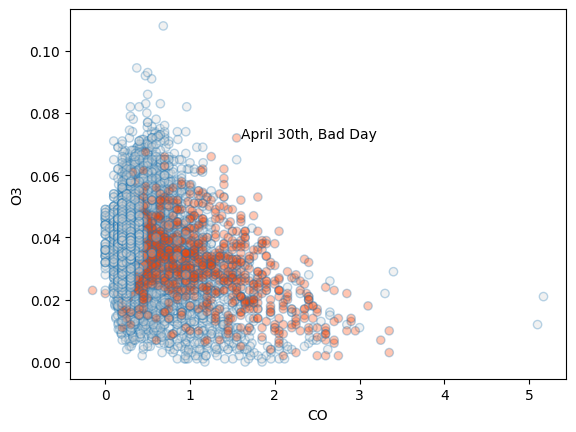

In [14]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

## Chapter 2 - Color in visualizations

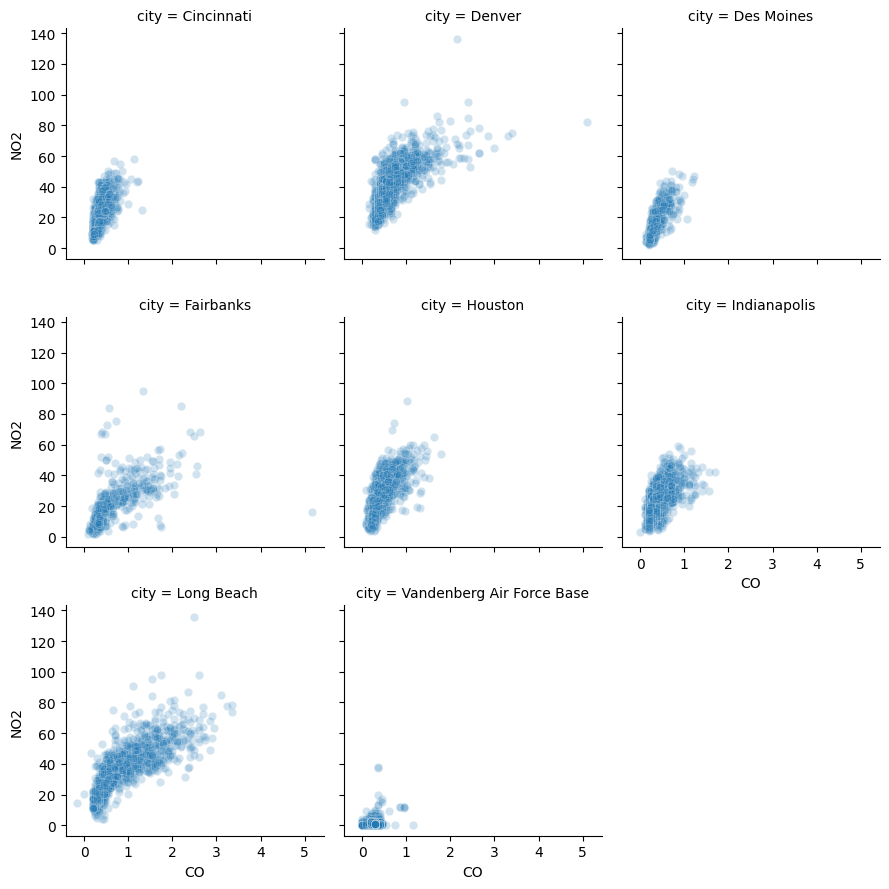

In [15]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot,'CO', 'NO2', alpha = 0.2)
plt.show()

Fixing seaborn's bar charts

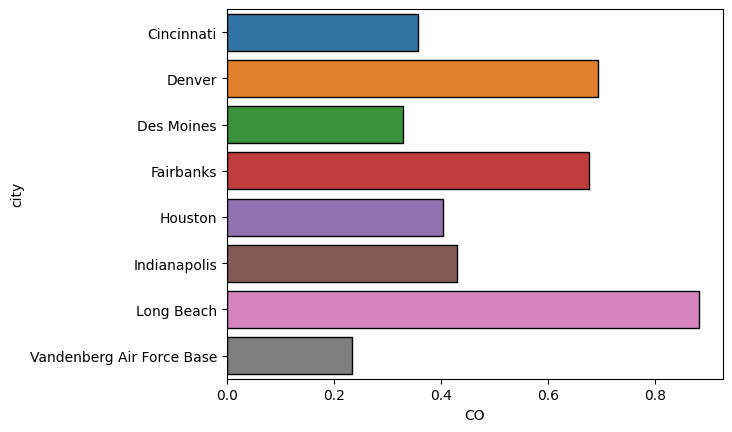

In [24]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            data = pollution,
            # Add a border to the bars
            errorbar=("ci", 0),
            edgecolor = 'black')
plt.show()

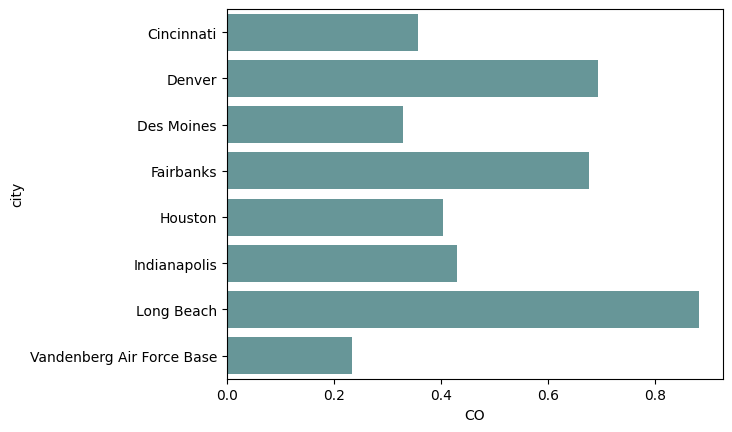

In [27]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            errorbar=("ci", 0),
            data = pollution,
            # Replace border with bar colors
            color = 'cadetblue')
plt.show()

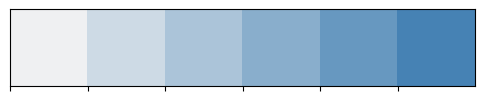

In [28]:
blue_scale = sns.light_palette("steelblue")
sns.palplot(blue_scale)
plt.show()

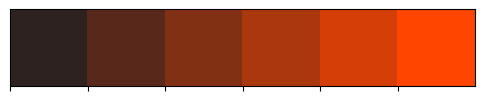

In [29]:
red_scale = sns.dark_palette("orangered")
sns.palplot(red_scale)
plt.show()

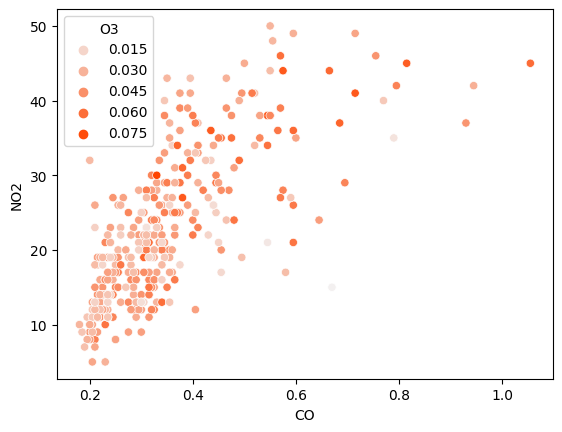

In [30]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                                  as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

Customizing a diverting palette heatmap

In [39]:
# # nov_2015_CO = pollution.query("month  ==  11 & year  ==  2015").CO

# # Define a custom palette
# color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# # Pass palette to plot and set axis ranges
# sns.heatmap(nov_2015_CO,
#             cmap = color_palette,
#             center = 0,
#             vmin = -4,
#             vmax = 4)
# plt.yticks(rotation = 0)
# plt.show()

(196, 8)

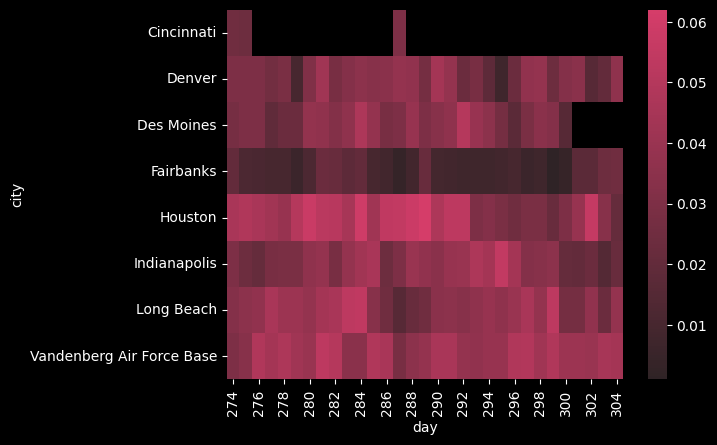

In [49]:
oct_2015 = pollution.query("month  ==  10 & year  ==  2015")
oct_2015_o3 = oct_2015.pivot_table(values = 'O3', columns = 'day', index = 'city')


# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()


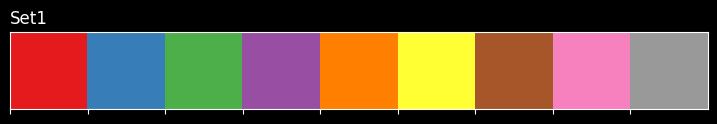

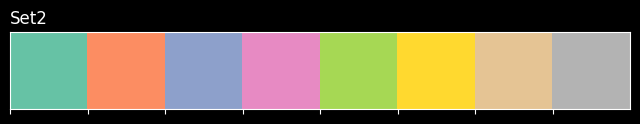

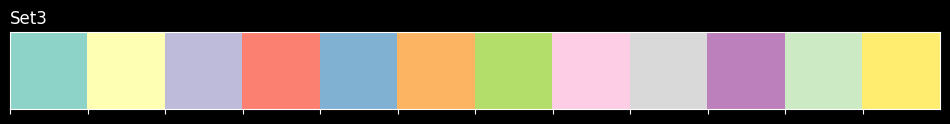

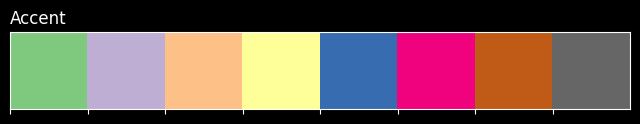

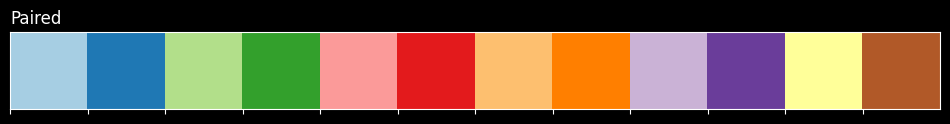

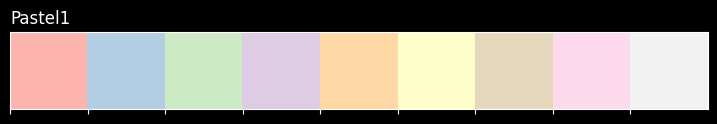

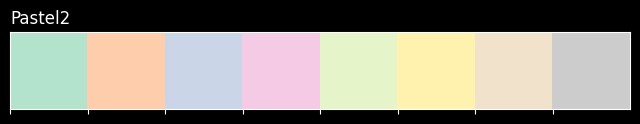

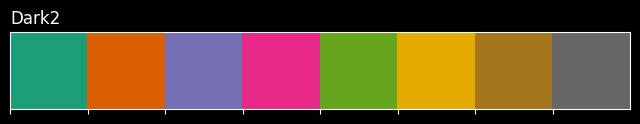

In [50]:
colorbrewer_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal, loc = 'left')

Palettes for ordinal data

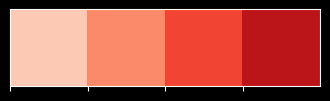

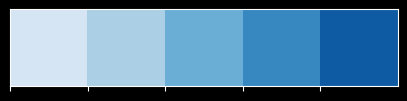

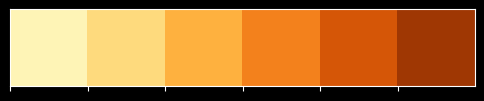

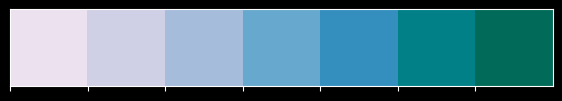

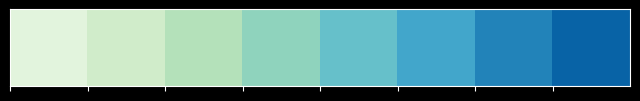

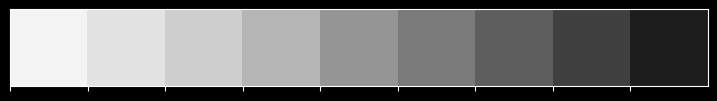

In [51]:
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']
for i, pal in enumerate(colorbrewer_palettes):
	sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))

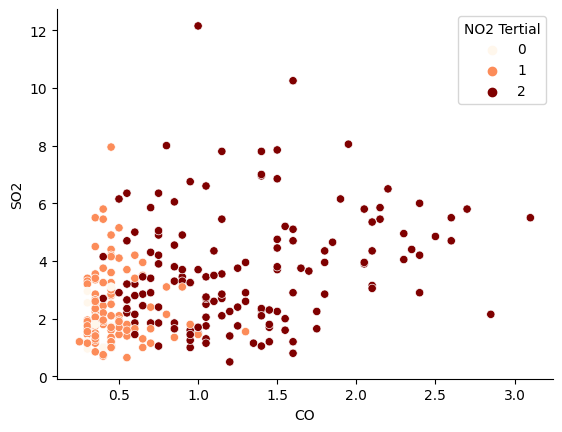

In [55]:
plt.style.use("default")

# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)
# Plot colored by the computer tertials
sns.scatterplot(x="CO", y="SO2", hue='NO2 Tertial', palette="OrRd",
data=pollution.query("city == 'Long Beach' & year == 2014"))
sns.despine()
plt.show()

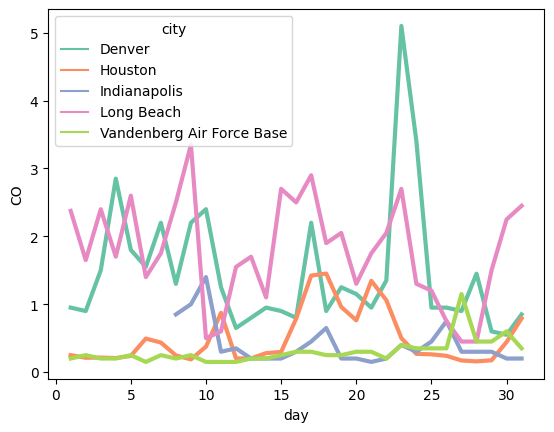

In [56]:
# Filter data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day",
             y = "CO",
             hue = "city",
             palette = "Set2",
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [ ]:
# # Choose the combos that get distinct colors
# wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# # Assign a new column to DataFrame for isolating the desired combos
# city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# # Plot lines with color driven by new column and lines driven by original categories
# sns.lineplot(x = "month",
#              y = "value",
#              hue = 'color_cats',
#              units = 'city_pol',
#              estimator = None,
#              palette = 'Set2',
#              data = city_pol_month)
# plt.show()

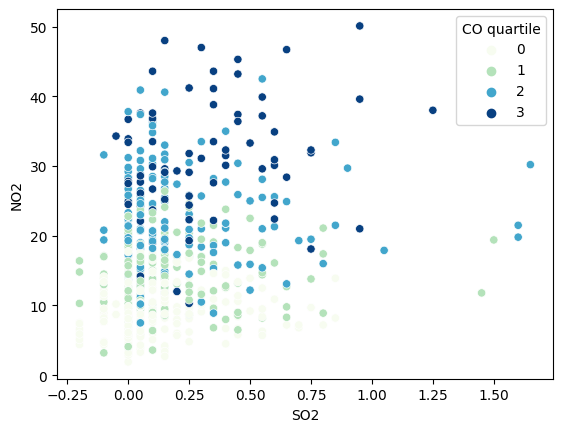

In [59]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()